<a href="https://colab.research.google.com/github/KoMurase/network/blob/master/network_analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import networkx as nx 
import matplotlib.pyplot as plt 

from google.colab import files 
uploaded = files.upload()

Saving lesmis.gml to lesmis (1).gml


In [14]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

  G = nx.readwrite.gml.read_gml(fn)

User uploaded file "lesmis.gml" with length 17610 bytes


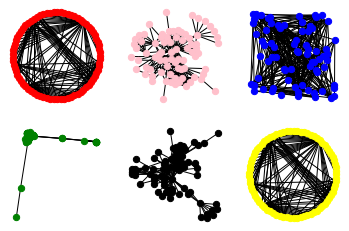

In [15]:
#draw_circular : 頂点を円周上に配置する
plt.subplot(231)
nx.draw_circular(G, node_size=40, node_color='red', with_labels=False)
#draw_kamada_kawai : 頂点を力学モデルに配置する
plt.subplot(232)
nx.draw_kamada_kawai(G, node_size=40, node_color='pink',with_labels=False)
#draw_random : 頂点をランダムに配置する
plt.subplot(233)
nx.draw_random(G , node_size=40, node_color='blue',with_label=False)
#draw_spectral : ネットワークを表す行列の固有ベクトルにより頂点を配置する
plt.subplot(234)
nx.draw_spectral(G, node_size=40 , node_color='green' , with_labels=False)
#draw_spring : 頂点を力学モデルにより配置する
plt.subplot(235)
nx.draw_spring(G, node_size=40 , node_color='black' , with_labels=False)
#draw_shell : 頂点を円周上に配置する
plt.subplot(236)
nx.draw_shell(G, node_size=40 , node_color='yellow' , with_labels=False)

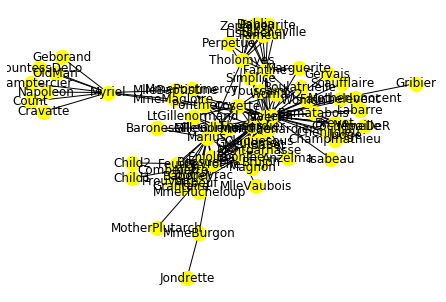

In [16]:
nx.draw_spring(G, node_size=200 , node_color='yellow' , with_labels=True)

Saving lesmis.gml to lesmis (3).gml
User uploaded file "lesmis.gml" with length 17610 bytes


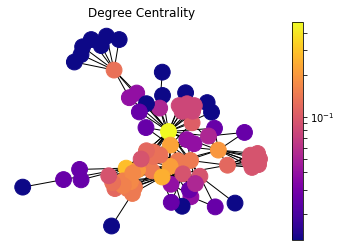

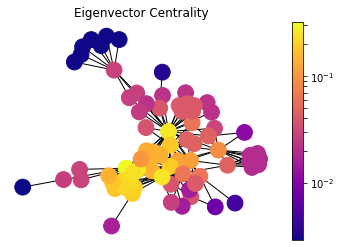

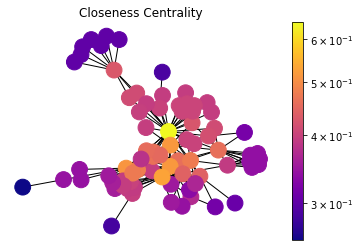

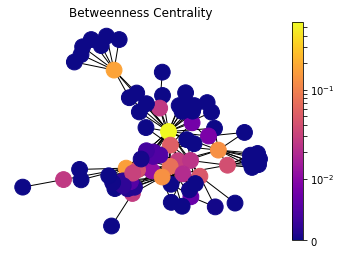

In [22]:
import matplotlib.colors as mcolors
import numpy as np
import numpy.linalg as LA
from pprint import pprint

def draw_h(G, pos, measures, measure_name):
  nodes = nx.draw_networkx_nodes(G,pos,node_size=250,cmap=plt.cm.plasma,
                                node_color=list(measures.values()),
                                node=list(measures.keys()))
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01,linscale=1))
  #labels=nx.draw_networkx_labels(G,pos)
  edges = nx.draw_networkx_edges(G, pos)
  plt.title(measure_name)
  plt.colorbar(nodes)
  plt.axis('off')
  plt.show()

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  G = nx.readwrite.gml.read_gml(fn)
pos = nx.spring_layout(G)

pos = nx.spring_layout(G)
draw_h(G,pos,nx.degree_centrality(G),'Degree Centrality')
draw_h(G,pos,nx.eigenvector_centrality(G),'Eigenvector Centrality')
draw_h(G,pos,nx.closeness_centrality(G),'Closeness Centrality')
draw_h(G,pos,nx.betweenness_centrality(G),'Betweenness Centrality')